In [2]:
"""example code for counting subgraph structures"""
from subgraph_counting import pattern, conversion, datasets
from subgraph_counting.graph import Graph
import matplotlib.pyplot as plt

PLOT_ROOT = '../data/figures'
DATA_ZINC = '../data/datasets/ZINC'

c:\Users\smaimo\Miniconda3\envs\gnns\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load ZINC Dataset

In [3]:
# get ZINC dataset
datasets_pyg = datasets.get_zinc_dataset(f"{DATA_ZINC}/original")

# Plot first graph of ZINC Train Set

(<Figure size 640x480 with 1 Axes>, <Axes: >)

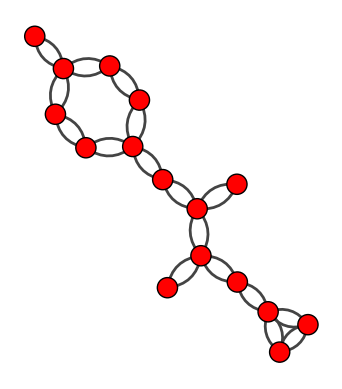

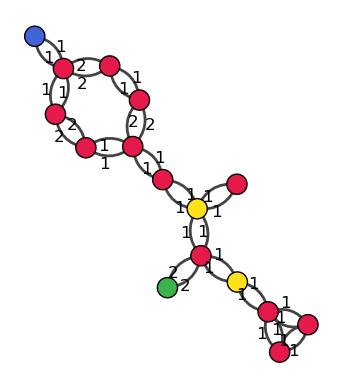

In [4]:
graph_pyg = datasets_pyg['train'][2]
graph = Graph(graph_pyg, edge_attribute='edge_attr', node_attribute='x')
graph.plot() #, f'{PLOT_ROOT}/zink_train_1.svg'
graph.plot(#, f'{PLOT_ROOT}/zink_train_1_attributes.svg'
           node_colors=True,
           edge_labels=True)

# Find Subisomorphisms
## Without considering node or edge labels

Graph test[213]
Subisomorphisms counting automorphisms: 22
Subisomorphisms not counting automorphisms: 1.0


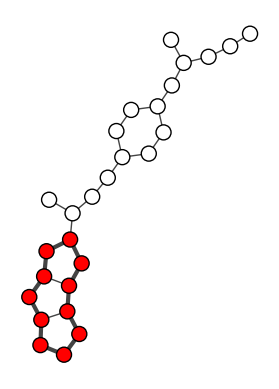

Graph test[354]
Subisomorphisms counting automorphisms: 44
Subisomorphisms not counting automorphisms: 2.0


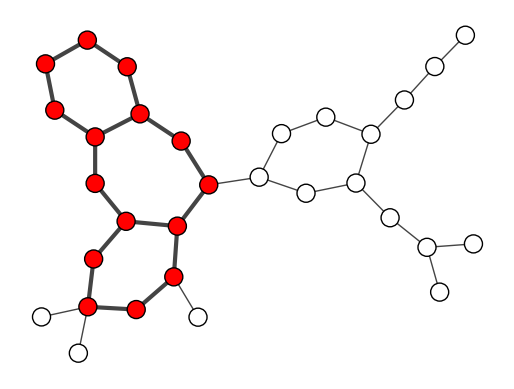

Graph test[397]
Subisomorphisms counting automorphisms: 22
Subisomorphisms not counting automorphisms: 1.0


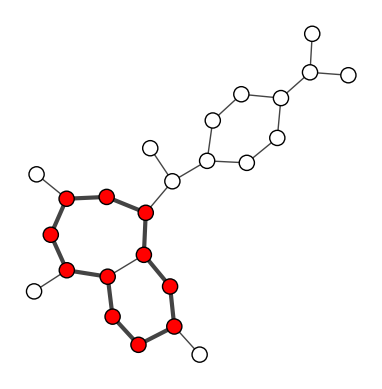

Graph test[456]
Subisomorphisms counting automorphisms: 22
Subisomorphisms not counting automorphisms: 1.0


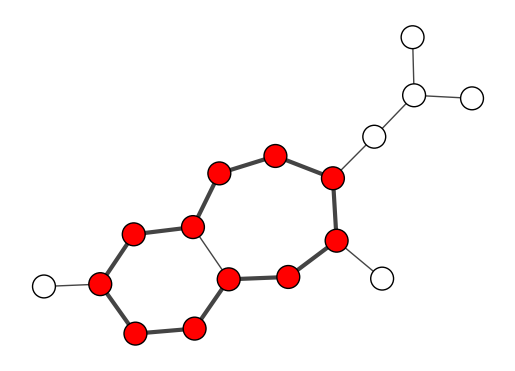

Graph test[525]
Subisomorphisms counting automorphisms: 22
Subisomorphisms not counting automorphisms: 1.0


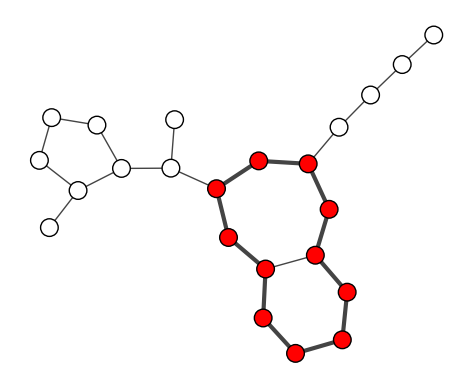

Graph test[593]
Subisomorphisms counting automorphisms: 22
Subisomorphisms not counting automorphisms: 1.0


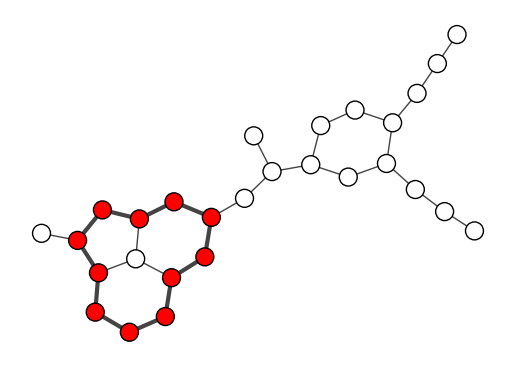

Graph test[678]
Subisomorphisms counting automorphisms: 22
Subisomorphisms not counting automorphisms: 1.0


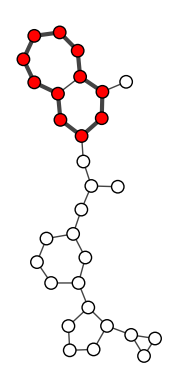

In [8]:
# get ZINC dataset
zinc_train_100 = datasets_pyg['train'][:1000]
cycle_8_ig = pattern.create_cycle(11)
cycle_8_pyg = conversion.igraph_to_pyg_graph(cycle_8_ig)
cycle_8 = Graph(cycle_8_pyg, pyg_to_undirected=True)
for i, graph_pyg in enumerate(zinc_train_100):
    graph = Graph(graph_pyg, pyg_to_undirected=True)
    subisomorphisms = graph.get_subisomorphisms(cycle_8)
    if subisomorphisms:
        print(f"Graph test[{i}]")
        print(f"Subisomorphisms counting automorphisms: {len(subisomorphisms)}")
        subgraph_count = graph.count_subisomorphisms(cycle_8)
        print(f"Subisomorphisms not counting automorphisms: {subgraph_count}")
        fig, _ = graph.plot( #f'{PLOT_ROOT}/zink_train_{i}_cycle_8.svg'
                subgraph=cycle_8)
        plt.show()
        plt.close(fig)

## Consider node and edge labels

Subisomorphisms counting automorphisms: 1
Subisomorphisms not counting automorphisms: 1.0


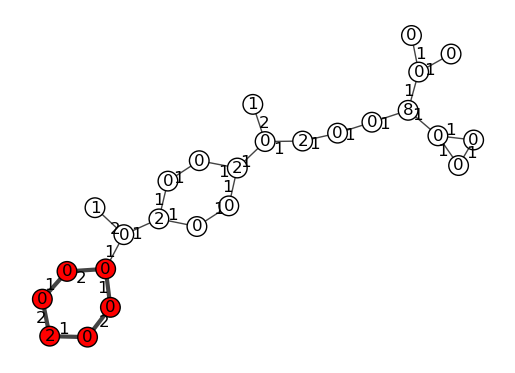

Subisomorphisms counting automorphisms: 1
Subisomorphisms not counting automorphisms: 1.0


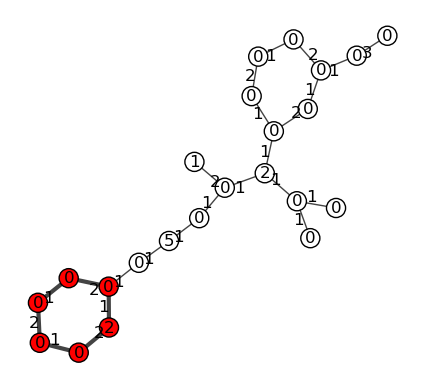

Subisomorphisms counting automorphisms: 1
Subisomorphisms not counting automorphisms: 1.0


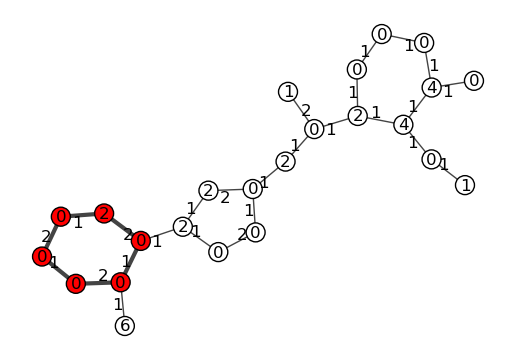

Subisomorphisms counting automorphisms: 1
Subisomorphisms not counting automorphisms: 1.0


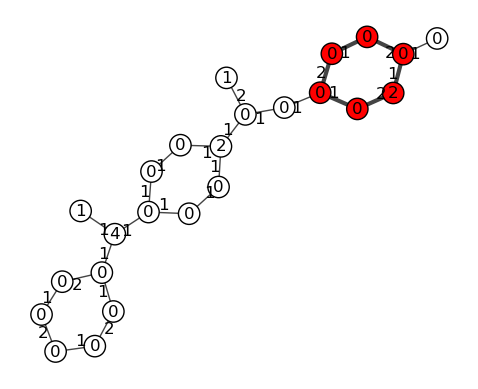

Subisomorphisms counting automorphisms: 1
Subisomorphisms not counting automorphisms: 1.0


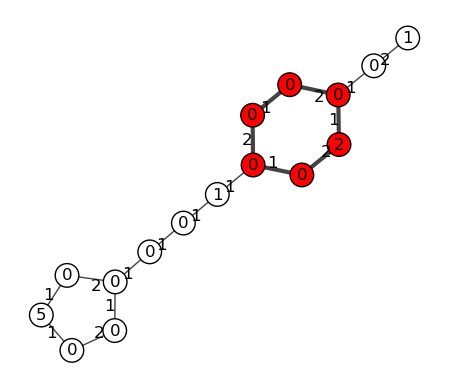

Subisomorphisms counting automorphisms: 1
Subisomorphisms not counting automorphisms: 1.0


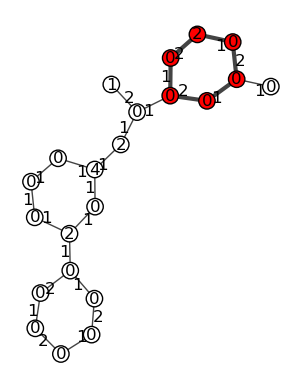

Subisomorphisms counting automorphisms: 1
Subisomorphisms not counting automorphisms: 1.0


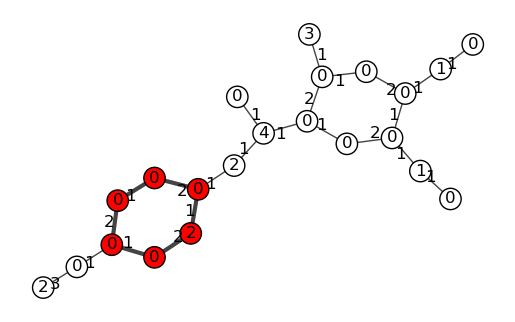

In [6]:
import torch

zinc_train_40 = datasets_pyg['train'][:40]

subgraph_pattern = pattern.create_cycle(6)
subgraph_node_colors = [0, 0, 0, 0, 0, 2]
subgraph_edge_colors = [1, 2, 1, 2, 1, 2]
cycle_6_pyg = conversion.igraph_to_pyg_graph(subgraph_pattern)
cycle_6_pyg.x = torch.as_tensor(subgraph_node_colors).unsqueeze(1)
cycle_6_pyg.edge_attr = torch.as_tensor(subgraph_edge_colors).unsqueeze(1)
cycle_6 = Graph(cycle_6_pyg, pyg_to_undirected=True, node_attribute='x', edge_attribute='edge_attr')
for i, graph_pyg in enumerate(zinc_train_40):
    graph = Graph(graph_pyg, pyg_to_undirected=True, node_attribute='x', edge_attribute='edge_attr')
    subisomorphisms = graph.get_subisomorphisms(cycle_6)

    if subisomorphisms:
        print(f"Subisomorphisms counting automorphisms: {len(subisomorphisms)}")
        subgraph_count = graph.count_subisomorphisms(cycle_6)
        print(f"Subisomorphisms not counting automorphisms: {subgraph_count}")

        fig, _ = graph.plot( #f'{PLOT_ROOT}/zink_train_{i}_cycle_8.svg'
            edge_labels=True,
            node_labels=True,
            subgraph=cycle_6)
        plt.show()
        plt.close(fig)
